## Support Vector Classifier Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create a synthetic dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, 
                           n_features=2, 
                           n_classes=2,
                           n_redundant=0, 
                           n_clusters_per_class=2, 
                           random_state=42)

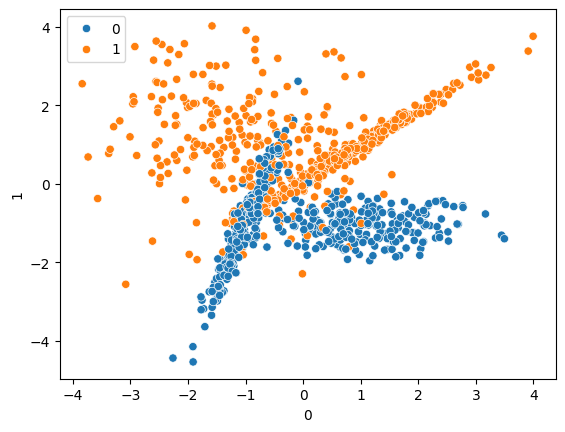

In [8]:
# Creata a scatter plot of the data
sns.scatterplot(x=pd.DataFrame(X)[0], # First column of X
                y=pd.DataFrame(X)[1], # Second column of X
                hue=y);

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42)

In [10]:
from sklearn.svm import SVC

# Create a support vector classifier
svc = SVC(kernel='linear')

# Train the classifier
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [11]:
svc.coef_

array([[-0.16635655,  1.43417789]])

In [12]:
# Make predictions on the test set
y_pred = svc.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       101
           1       0.88      0.88      0.88        99

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



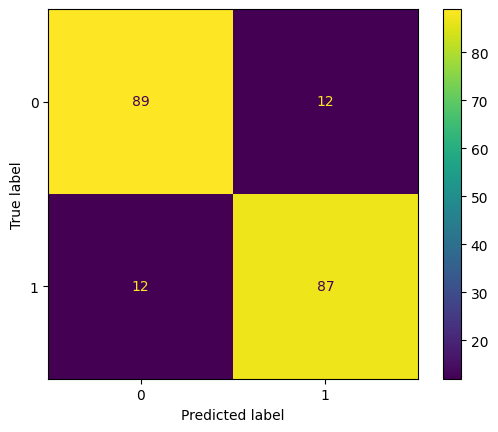

In [16]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# Print the classification report
print(classification_report(y_true=y_test, y_pred=y_pred))

# Create a confusion matrix with ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot();


In [17]:
# Create a support vector classifier with a radial basis function kernel
rbf = SVC(kernel='rbf')

# Train the classifier
rbf.fit(X_train, y_train)

SVC()

In [18]:
# Make predictions on the test set
y_pred1 = rbf.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       101
           1       0.93      0.86      0.89        99

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



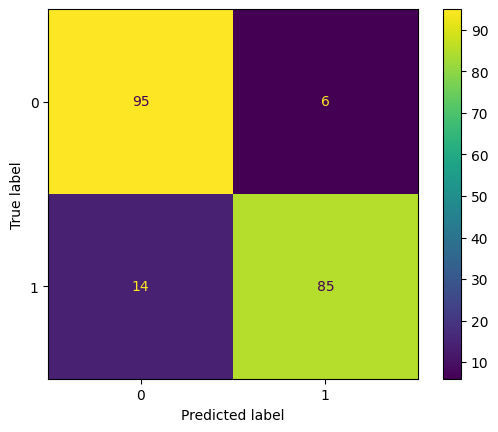

In [19]:
# Print the classification report
print(classification_report(y_true=y_test, y_pred=y_pred1))

# Create a confusion matrix with ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test, y_pred=y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rbf.classes_)
disp.plot();

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       101
           1       0.84      0.94      0.89        99

    accuracy                           0.88       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.88      0.88       200



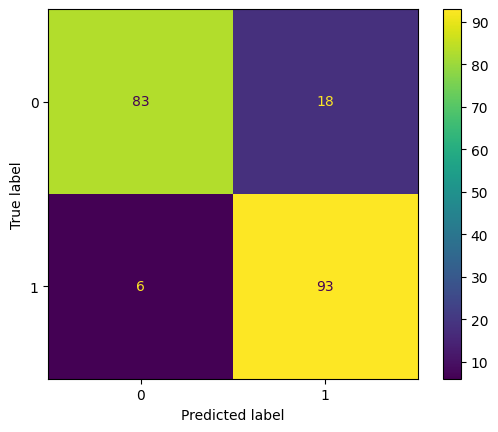

In [20]:
# Create a support vector classifier with a polynomial kernel
polynomial=SVC(kernel='poly')

# Train the classifier
polynomial.fit(X_train,y_train)

# Make predictions on the test set
y_pred2=polynomial.predict(X_test)

# Print the classification report
print(classification_report(y_test,y_pred2))

# Create a confusion matrix with ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test, y_pred=y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=polynomial.classes_)
disp.plot();

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       101
           1       0.76      0.85      0.80        99

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



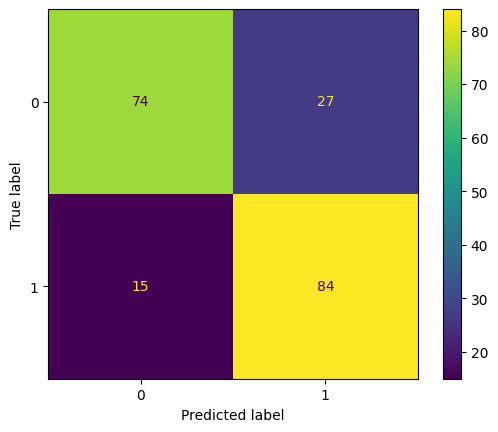

In [21]:
# Create a support vector classifier with a sigmoid kernel
sigmoid = SVC(kernel='sigmoid')

# Train the classifier
sigmoid.fit(X_train,y_train)

# Make predictions on the test set
y_pred3 = sigmoid.predict(X_test)

# Print the classification report
print(classification_report(y_true=y_test, y_pred=y_pred3))

# Create a confusion matrix with ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test, y_pred=y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sigmoid.classes_)
disp.plot();

In [22]:
sigmoid.intercept_

array([-0.23273628])

## Hyperparametere Tuning With SVC

In [23]:
from sklearn.model_selection import GridSearchCV
 
# Create a grid search dictionary
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [24]:
grid = GridSearchCV(estimator=SVC(),
                    param_grid=param_grid,
                    refit=True,
                    cv=5,
                    verbose=3)

In [25]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.894 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.881 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.881 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.856 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.894 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.850 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.869 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.838 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.894 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [26]:
# Print the best parameters, score, and estimator
print('Best Parameters:', grid.best_params_)
print('Best Score:', grid.best_score_)
print('Best Estimator:', grid.best_estimator_)

Best Parameters: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
Best Score: 0.9037500000000002
Best Estimator: SVC(C=1000, gamma=1)


              precision    recall  f1-score   support

           0       0.92      0.98      0.95       101
           1       0.98      0.91      0.94        99

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



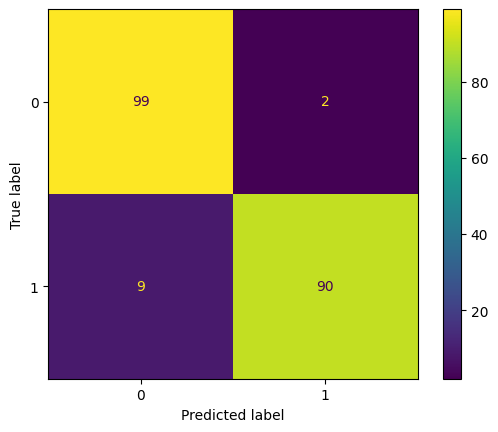

In [27]:
# Make predictions on the test set
y_pred4 = grid.predict(X_test)

# Print the classification report
print(classification_report(y_true=y_test, y_pred=y_pred4))

# Create a confusion matrix with ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test, y_pred=y_pred4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot();